### Taylor Approximation

Taylor Approximation of a function aims to define the function in terms of polynomials.
This makes them easier to deal with in general.

For example, functions like $sin(x)$, $cos(x)$ & $ln(x)$ (infinitely differentiable functions) are sometimes easier to deal with when expressed as polynomials.

The taylor approximation of a polynomial is the polynomial itself.


### Definition

For $F(x)$ that we want to approximate around the point a

Let $F(x) = c_{0} + c_{1}(x - a) + c_{2}(x - a)^2 + c_{3}(x-a)^3 + ...$ 


### Getting the coefficents

#### Finding $c_{0}$
Start by plugging $x = a$.

We get $F(a) = c_{0}$

Now $F(x) = F(a) + c_{1}(x-a) + c_{2}(x-a)^2 + c_{3}(x-a)^3 + ...$

#### Finding $c_{1}$
To find $c_{1}$, differentiate & plug $x = a$

$F'(x) = c_{1} + 2c_{2}(x-a) + 3c_{3}(x-a)^2 + ...$ 

Plugging $a$

$F'(a) = c_{1}$

Now $F(x) = F(a) + F'(a)(x-a) + c_{2}(x-a)^2 + c_{3}(x-a)^3 + ...$

##### Finding c2

Similarily, differentiate twice & plug $x=a$

$F''(x) = 2c_{2} + 6c_{3}(x-a) + ...$

Plugging $a$

$F''(a) = 2c_{2}$

Now $F(x) = F(a) + F'(a)(x-a) + \frac{1}{2} F''(a)(x-a)^2 + c_{3}(x-a)^3$

This pattern goes on for higher terms

So far we have obtained the quadratic approximation of $F(x)$

It's terms are

$c_{0} = F(a)$ is the constant approximation of $F(x)$

$c_{1}(x-a) = F'(a) \ (x-a)$ is the linear approximation of $F(x)$

$c_{2}(x-a)^2 = \frac{1}{2} \ F''(a) \ (x-a)^2$ is the quadratic approximation of $F(x)$

##### General Formula

Approximation around point $a$ is equal to

$F(X) = \Sigma_{n = 0}^{\infty} \ \frac{1}{n!} \ F^n(a) \ (x-a)^n$

Each term we add approximates the function a little bit better

#### Visualization

In [1]:
import matplotlib.pyplot as plt
import math

import autograd.numpy as np
from autograd import grad

In [2]:
def taylor_approx(f, a, n_terms):
    deriv = f
    coeffs = []

    for i in range(n_terms):
        c = (1 / math.factorial(i)) * deriv(a)
        coeffs.append(c)
        deriv = grad(deriv)


    def t(x):
        ys = []

        for val in x:
            if len(coeffs) == 1:
                ys.append(coeffs[0])
                continue

            y = coeffs[0] + sum(coeffs[i] * (val - a) ** i for i in range(1, len(coeffs)))
            ys.append(y)
        return ys  

    return t


In [3]:
# Helper functions
def plot_graphs(f, approx_pt, x_window=2, y_window=2):

    xs = np.linspace(approx_pt - x_window, approx_pt + x_window, 50)
    ys = f(xs)

    y_min, y_max = min(ys), max(ys)

    const_approx = taylor_approx(f, approx_pt, 1)
    lin_approx = taylor_approx(f, approx_pt, 2)
    quad_approx = taylor_approx(f, approx_pt, 3)
    cubic_approx = taylor_approx(f, approx_pt, 4)

    fig, axs = plt.subplots(2,2, figsize=(10, 10))
    
    axs[0, 0].plot(xs, ys, label='Original Fn', c='r')
    axs[0, 0].plot(xs, const_approx(xs), label='Const Approx', c='g')

    axs[0, 1].plot(xs, ys, label='Original Fn', c='r')
    axs[0, 1].plot(xs, lin_approx(xs), label='Linear Approx', c='b')

    axs[1, 0].plot(xs, ys, label='Original Fn', c='r')
    axs[1, 0].plot(xs, quad_approx(xs), label='Quad Approx', c='y')

    axs[1, 1].plot(xs, ys, label='Original Fn', c='r')
    axs[1, 1].plot(xs, cubic_approx(xs), label='Cubic Approx', c='g')

    for ax in axs.reshape(-1):
        ax.set_ylim(y_min - y_window , y_max + y_window)
        ax.legend()


#### Driver Code

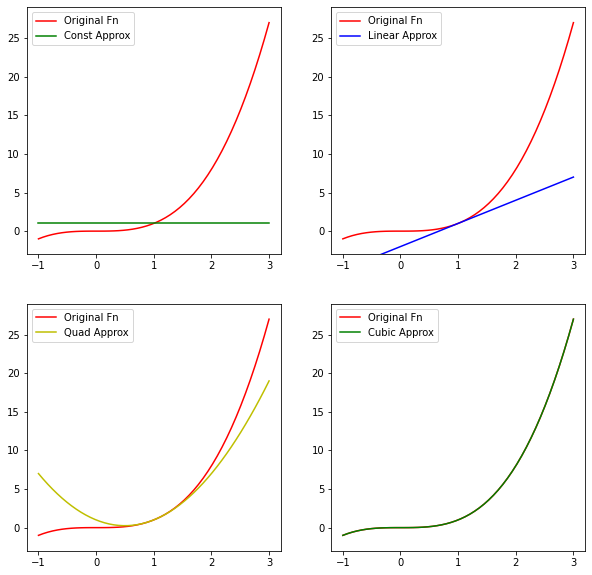

In [4]:
# Function to approximate
def f(x):
    return x ** 3

plot_graphs(f, 1.0)

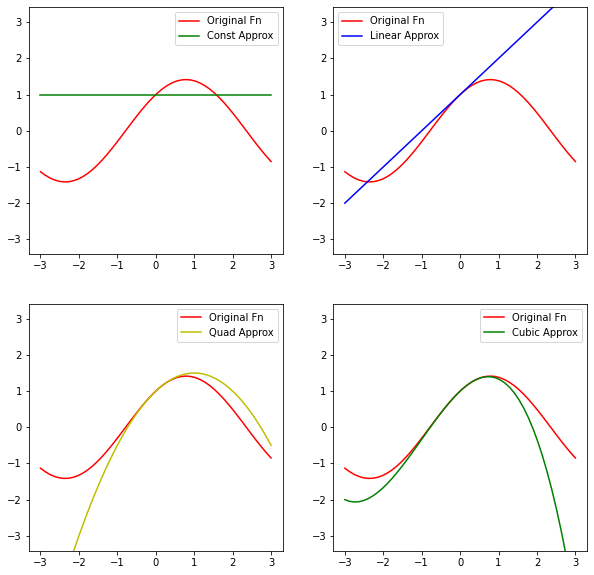

In [5]:
def f(x):
    return np.cos(x) + np.sin(x)

plot_graphs(f, float(0), x_window=3)

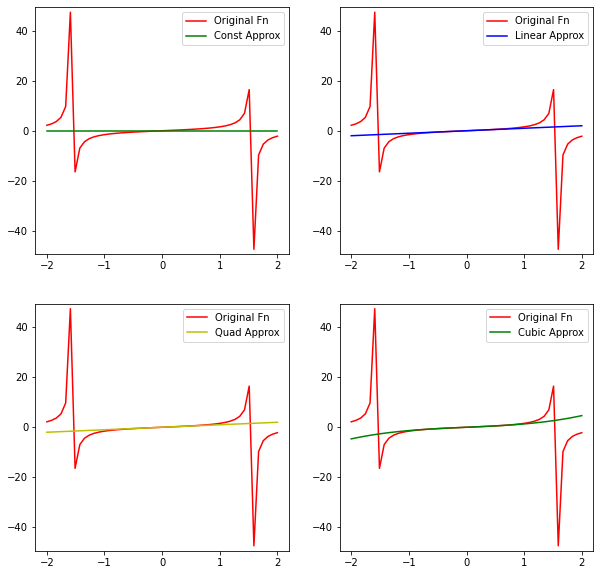

In [6]:
def f(x):
    return np.tan(x)

plot_graphs(f, float(0))